In [2]:
import atlasopenmagic as atom
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file = uproot.open('DAOD_PHYSLITE.38191914._000036.pool.root (1).1') #dosyayı açtık
tree = file['CollectionTree']

In [4]:
pt = tree["AnalysisPhotonsAuxDyn.pt"].array()
eta = tree["AnalysisPhotonsAuxDyn.eta"].array()
phi = tree["AnalysisPhotonsAuxDyn.phi"].array()
mass = tree["AnalysisPhotonsAuxDyn.m"].array()

ptcone20 = tree["AnalysisPhotonsAuxDyn.ptcone20_CloseByCorr"].array()
topoetcone20 = tree["AnalysisPhotonsAuxDyn.topoetcone20_CloseByCorr"].array()
topoetcone40 = tree["AnalysisPhotonsAuxDyn.topoetcone40_CloseByCorr"].array()

f1 = tree["AnalysisPhotonsAuxDyn.f1"].array()

cleaning = tree["AnalysisPhotonsAuxDyn.DFCommonPhotonsCleaning"].array()
isEMTight = tree["AnalysisPhotonsAuxDyn.DFCommonPhotonsIsEMTight"].array()

OQ = tree["AnalysisPhotonsAuxDyn.OQ"].array()

truthType = tree["AnalysisPhotonsAuxDyn.truthType"].array()
truthOrigin = tree["AnalysisPhotonsAuxDyn.truthOrigin"]. array()

In [5]:
pt

<Array [[7.71e+04, 5.27e+04], [...], ..., [...]] type='200000 * var * float32'>

In [6]:
pt_np = ak.flatten(pt).to_numpy()
eta_np = ak.flatten(eta).to_numpy()
phi_np = ak.flatten(phi).to_numpy()
mass_np = ak.flatten(mass).to_numpy()


In [7]:
print(f'Total number of photons in 200,000 events: {len(pt_np):,}')
pt_np

Total number of photons in 200,000 events: 661,372


array([77054.32  , 52663.703 , 75387.336 , ...,  2483.5244,  2628.9575,
        1823.9982], shape=(661372,), dtype=float32)

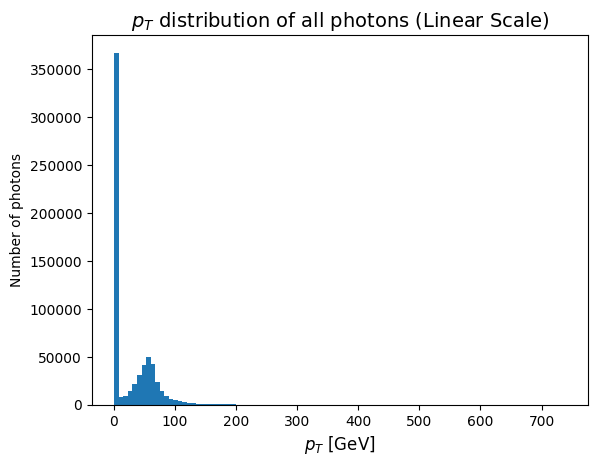

In [8]:
pt_gev = pt_np / 1000  # MeV to GeV

plt.hist(pt_gev, bins=100)
plt.title('$p_T$ distribution of all photons (Linear Scale)', fontsize=14)
plt.xlabel('$p_T$ [GeV]', fontsize=12)
plt.ylabel('Number of photons')
plt.show()

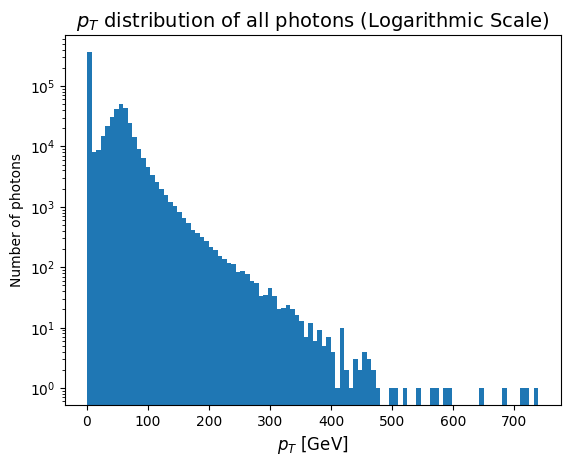

In [9]:
plt.hist(pt_gev, bins=100,)
plt.yscale('log')
plt.title('$p_T$ distribution of all photons (Logarithmic Scale)', fontsize=14)
plt.xlabel('$p_T$ [GeV]', fontsize=12)
plt.ylabel('Number of photons')
plt.show()

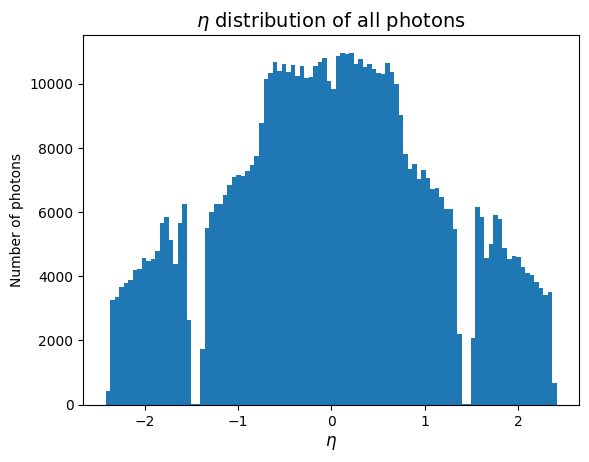

In [10]:
plt.hist(eta_np, bins=100)
plt.title(r'$\eta$ distribution of all photons', fontsize=14)
plt.xlabel(r'$\eta$', fontsize=12)
plt.ylabel('Number of photons')
plt.show()

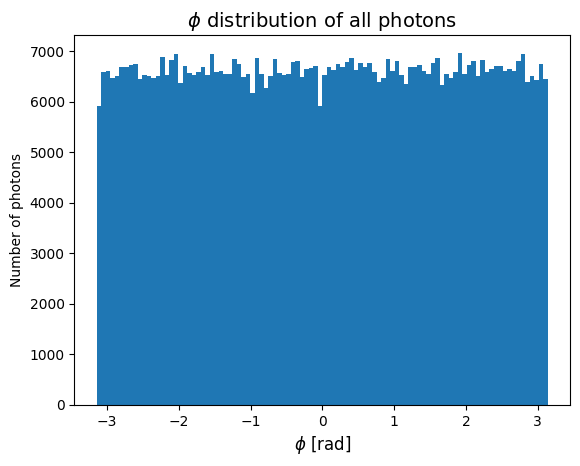

In [11]:
plt.hist(phi_np, bins=100)
plt.title(r'$\phi$ distribution of all photons', fontsize=14)
plt.xlabel(r'$\phi$ [rad]', fontsize=12)
plt.ylabel('Number of photons')
plt.show()

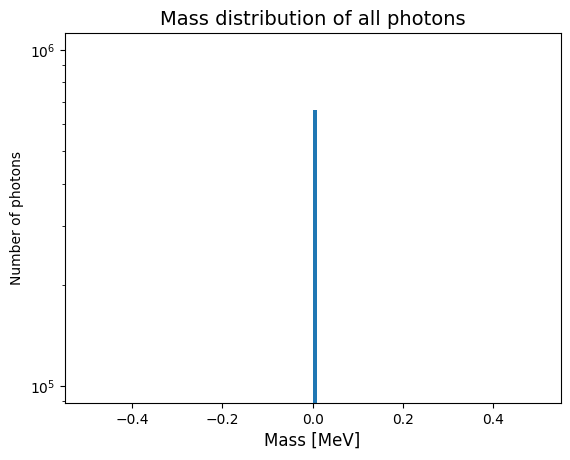

In [12]:
plt.hist(mass_np, bins=100, log=True)
plt.title('Mass distribution of all photons', fontsize=14)
plt.xlabel('Mass [MeV]', fontsize=12)
plt.ylabel('Number of photons')
plt.show()

In [13]:
truthType_np= ak.flatten(truthType).to_numpy()
truthOrigin_np= ak.flatten(truthOrigin).to_numpy()

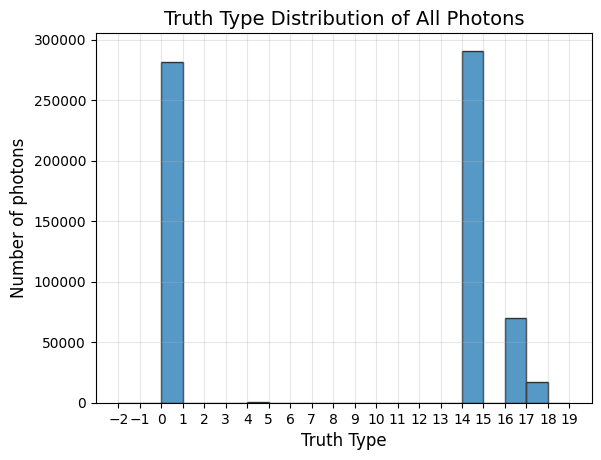

In [14]:
plt.hist(truthType_np, bins=range(-2, 20, 1 ), edgecolor='black', alpha=0.75)
plt.title('Truth Type Distribution of All Photons', fontsize=14)
plt.xlabel('Truth Type', fontsize=12)
plt.ylabel('Number of photons', fontsize=12)
plt.xticks(range(-2, 20, 1))
plt.grid(alpha=0.3)
plt.show()

Numaraların Anlamları: kaynak: https://gitlab.cern.ch/atlas/athena/blob/21.2/PhysicsAnalysis/MCTruthClassifier/MCTruthClassifier/MCTruthClassifierDefs.h


 0--> unknown Tanımsız

14 --> Isolated Photon izole foton

16 ---> Background Photon izole değil

17 ---> Hadron Background

Fotonların %50'si ISOLATED (çevrelerinde temiz)
 Fotonların %48'i tanımsız (soft QCD)
%3 background

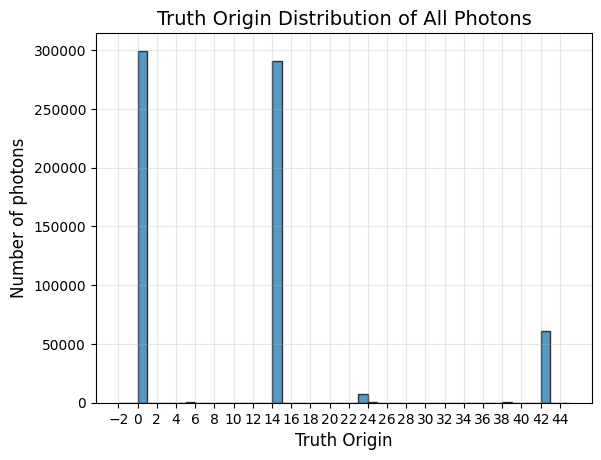

In [16]:
plt.hist(truthOrigin_np, bins=range(-2, 46, 1 ), edgecolor='black', alpha=0.75)
plt.title('Truth Origin Distribution of All Photons', fontsize=14)
plt.xlabel('Truth Origin', fontsize=12)
plt.ylabel('Number of photons', fontsize=12)
plt.xticks(range(-2, 46, 2))
plt.grid(alpha=0.3)
plt.show()

 0 ---> NonDefined (Not classified, could be anything)

 5----> PhotonConv

 14---> Higgs (From Higgs boson decay)

 23 --> LightMeson

 24 -->StrangeMeson

 38 --> Undrphoton

 42 --> piZero (pion bozunumundan gelen foton)

 Bu foton nereden geldi sorusunun cevabıdır.

Bu  truth bilgilerini modeli eğitmeden önce filtrelemede ya da modeli eğitmek için kullanmayacağız çünkü o zaman model overfitting yapar, gerçek dünyayı
öğrenemez. kural: Kural:
"Train the model on what it will see in reality"

In [18]:
cleaning_np= ak.flatten(cleaning).to_numpy()
isEMTight_np= ak.flatten(isEMTight).to_numpy()
OQ_np= ak.flatten(OQ).to_numpy()

İSTATİSTİKLER

In [19]:
print(f"Total photons: {len(cleaning_np):,}\n")

print("--- DFCommonPhotonsCleaning ---")
print(f"Passed): {np.sum(cleaning_np == 1):,} ({100*np.sum(cleaning_np==1)/len(cleaning_np):.2f}%)")
print(f"Failed:  {np.sum(cleaning_np != 1):,} ({100*np.sum(cleaning_np!=1)/len(cleaning_np):.2f}%)")

print("\n--- DFCommonPhotonsIsEMTight ---")
print(f"Passed): {np.sum(isEMTight_np == 1):,} ({100*np.sum(isEMTight_np==1)/len(isEMTight_np):.2f}%)")
print(f"Failed:  {np.sum(isEMTight_np != 1):,} ({100*np.sum(isEMTight_np!=1)/len(isEMTight_np):.2f}%)")

print("\n--- Object Quality (OQ) ---")
print(f"Good OQ :  {np.sum(OQ_np == 0):,} ({100*np.sum(OQ_np==0)/len(OQ_np):.2f}%)")
print(f"Bad OQ :   {np.sum(OQ_np != 0):,} ({100*np.sum(OQ_np!=0)/len(OQ_np):.2f}%)")


Total photons: 661,372

--- DFCommonPhotonsCleaning ---
Passed): 661,372 (100.00%)
Failed:  0 (0.00%)

--- DFCommonPhotonsIsEMTight ---
Passed): 327,540 (49.52%)
Failed:  333,832 (50.48%)

--- Object Quality (OQ) ---
Good OQ :  351,220 (53.10%)
Bad OQ :   310,152 (46.90%)


1. DFCommonPhotonsCleaning
"Bu foton detector'da problemli bir bölgede mi?"
1 = PASS  → Foton temiz bölgede, detector sorunsuz
0 = FAIL  → Foton problemli bölgede

2. DFCommonPhotonsIsEMTight
"Bu foton GERÇEKTEN foton mu, yoksa fake mi?"
1 = PASS  → Gerçek foton olasılığı YÜKSEK ✅
0 = FAIL  → Fake olabilir (hadron, electron, jet)

3. OQ (Object Quality)
"Detector bu fotonu ölçerken problem yaşadı mı?"
OQ = Object Quality
Bit mask (birden fazla problem olabilir)